<a href="https://colab.research.google.com/github/nicoavilan/Visualizacion-de-datos/blob/main/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WordCloud**

En este documento se hace un ejercicio de nube de palabras (WordCloud) a partir de los datos de un restaurante.

## Librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud

## Datos

In [5]:
url = "https://raw.githubusercontent.com/nicoavilan/Bases-de-datos/main/restaurant.csv"
df = pd.read_table(url, sep=",", index_col = "Unnamed: 0")
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


## Funciones

In [19]:
def my_tokenizer(text):
  return text.split() if text != None else []

def remove_stopwords(tokens):
  return [t for t in tokens if t not in STOP_WORDS]

def wordcloud(counter):
  wc = WordCloud(width = 1200, height = 800, background_color = "white", max_words=200)
  wc.generate_from_frequencies(counter)

  fig = plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation= "bilinear")
  plt.axis("off")
  plt.tight_layout(pad=0)
  plt.show()

## Tokens y Gráfica

In [7]:
tokens = df.item_name.map(my_tokenizer).sum()
counter = Counter(tokens)
counter = Counter(remove_stopwords(tokens))

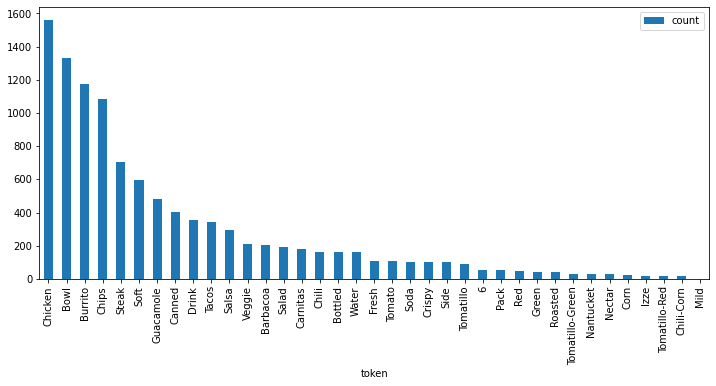

In [21]:
freq = pd.DataFrame.from_records(counter.most_common(200),columns = ["token", "count"])
freq.plot(kind = "bar", x= "token", figsize= (12, 5));

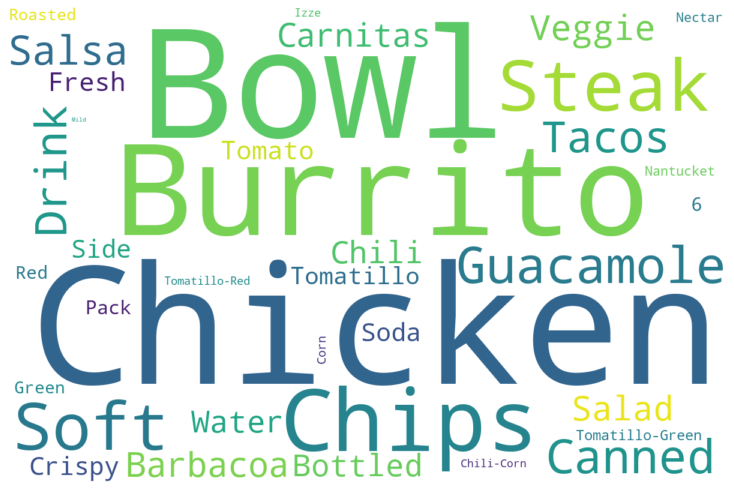

In [20]:
wordcloud(counter)